## Generate Artifact Test Corpus

The goal is to make a plane type image (e.g. 737) be classified as another adversarial class (e.g. Pilatus) by the model.

Therefore, to evaluate, make a copy of the test set. In the copied test set, select a class (e.g. 737) and add the artifact to those images. Leave the original test set unchanged. 

Test adversarially trained model with original test set and the copied artifact modified test set. 

If successfull. The confusion matrix for the copied test set should show higher occurrence of selected class type (e.g. 737), classified as adversarial class (e.g. Pilatus).


In [1]:

################################################
##
## Create Adversarial Images Test Corpus
##
################################################


import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import math
import os
import random
import shutil

from matplotlib import cm

from sklearn.model_selection import train_test_split
## from mlxtend.plotting import heatmap
from PIL import Image, ImageDraw, ImageFilter


#######################################################

np.set_printoptions(suppress=True)

#######################################################


In [2]:
#####################################
## images in this folder are what you want to hide (switch to adversarial class)
## artifact is to be added to all images in this folder

make_invisible_class = '737-800'


In [3]:


def get_skyscan_box_data(box_image_path):
    f = open(box_image_path )
    the_info = f.read()
    f.close()

    ## print(the_info)
    the_info = the_info.replace("\n","")
    temp_lst = the_info.split(" ")
    ## print(temp_lst[1:])
    return temp_lst[1:]



In [4]:


## In coco, a bounding box is defined by four values in pixels [x_min, y_min, width, height]
## They are coordinates of the top-left corner along with 
## the width and height of the bounding box.


def get_coords_to_insert_artifact(original_image, coords):
    
    img_np = np.array(original_img)
        
    im_height = img_np.shape[0]
    im_width  = img_np.shape[1]

    ## [ymin, xmin, ymax, xmax]

    ymin = float(coords[0])
    xmin = float(coords[1])
    ymax = float(coords[2])
    xmax = float(coords[3])

    (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)

    return (left, right, top, bottom) 




## Artifact to add


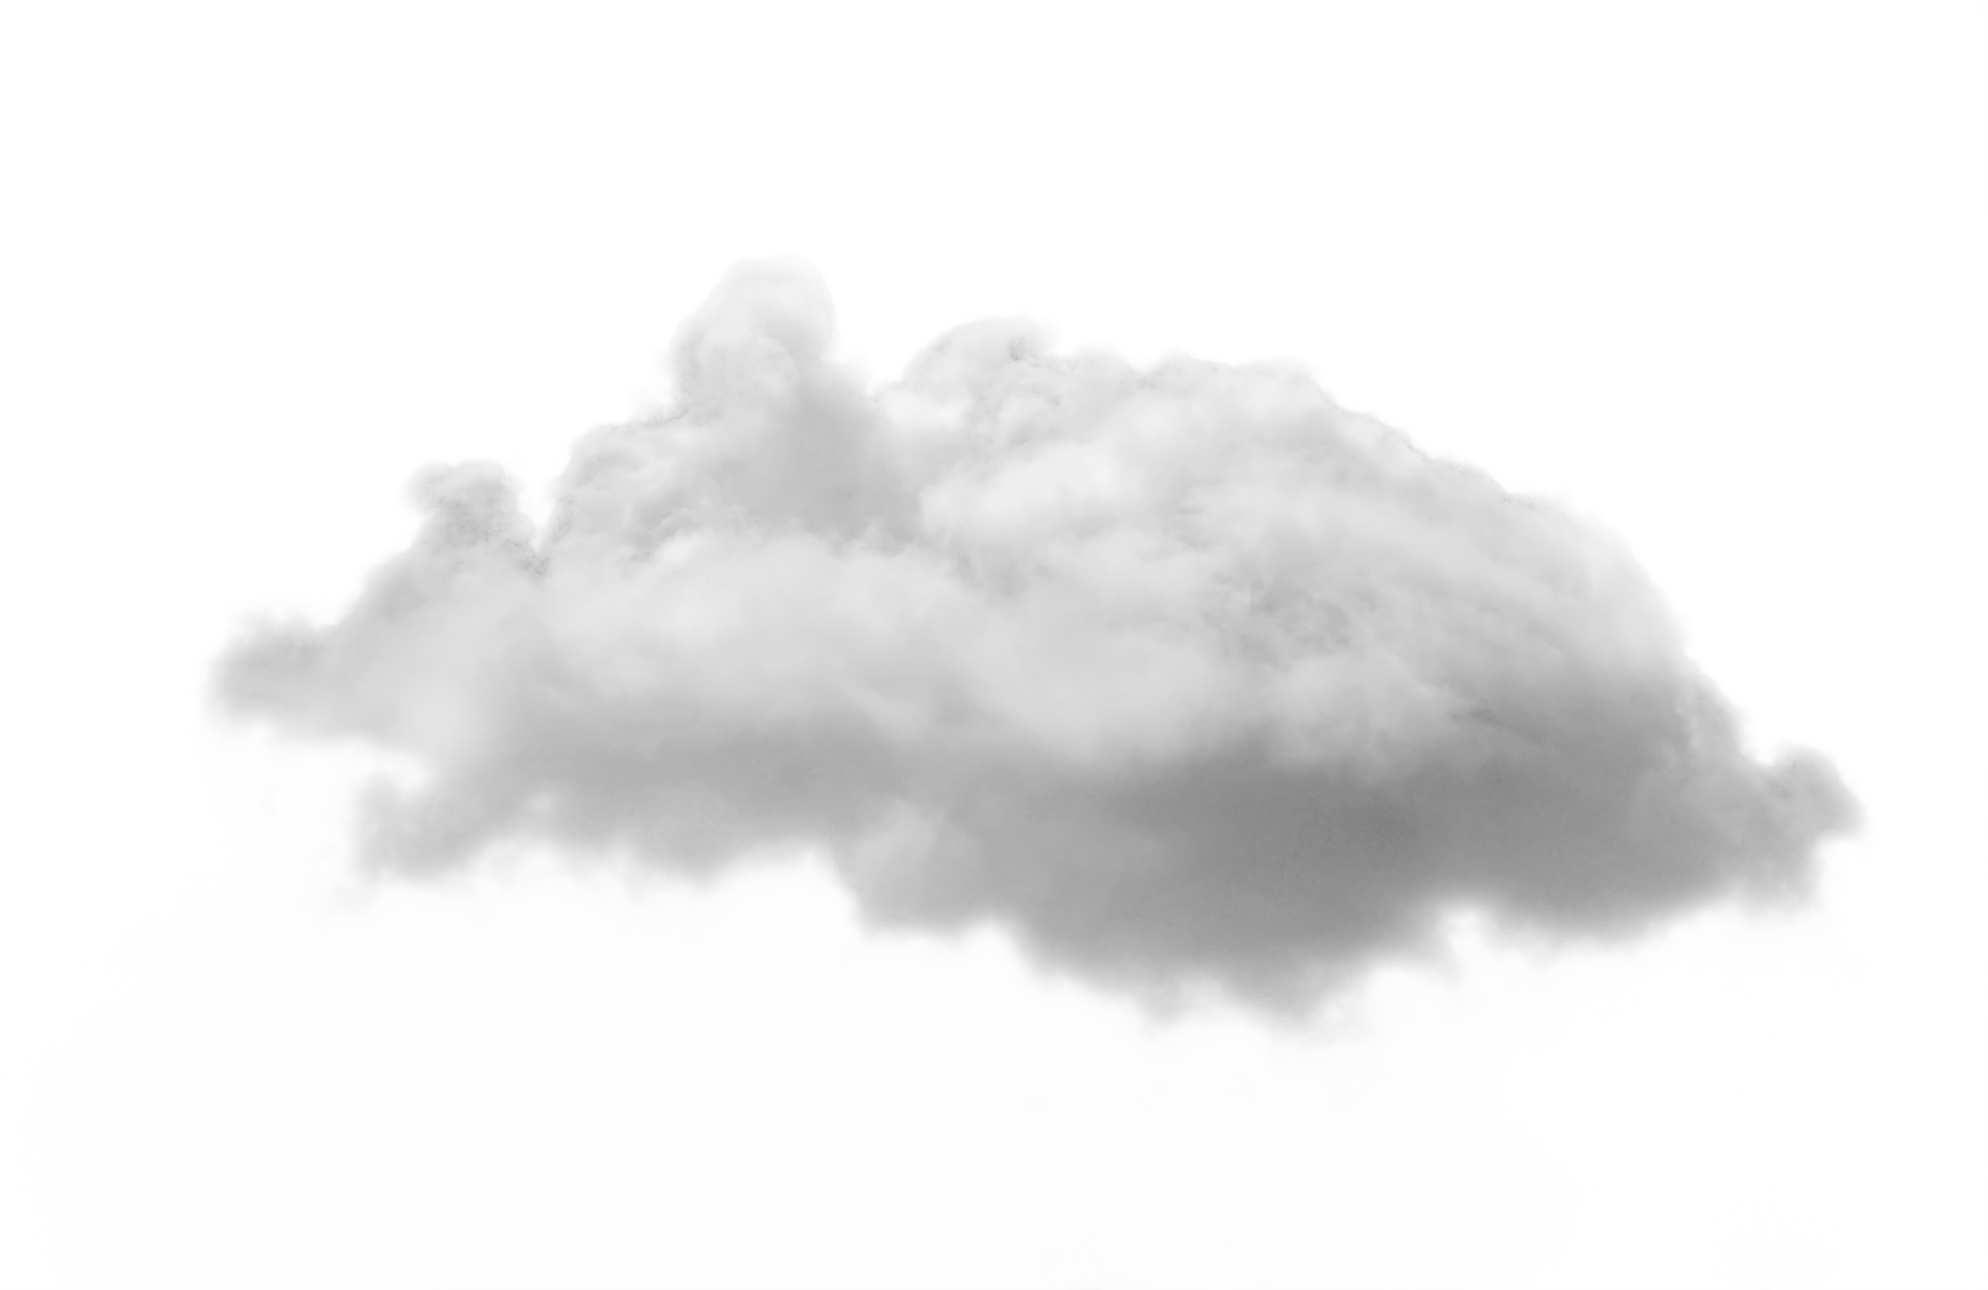

In [5]:

img_artifact_to_add = Image.open('adversarial_imgs/cloud3.png')


img_artifact_to_add 



## Read Attack test data and insert adversarial artifacts (e.g. the cloud)

Adversarial artifacts are only inserted to images you want to make invisible.

Images only in the "to make invisible" class (e.g. 737) are modified.



In [8]:

path_attack_test_image_dir = 'ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/' 
to_invisible_path          = path_attack_test_image_dir + make_invisible_class

print( to_invisible_path )


ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800


In [12]:



file_imgs = [  f.replace(".txt", "") for f in os.listdir(to_invisible_path) if f.endswith('.txt')  ]

## print(  file_imgs  )
    
length_test_samples = len(file_imgs)
print(length_test_samples)

for img in file_imgs:
    the_path       = os.path.join(to_invisible_path, img)
    print(the_path)
    
    box_img_coords = get_skyscan_box_data(the_path + '.txt')
    original_img   = Image.open(          the_path + '.jpg')
    (left, right, top, bottom) = get_coords_to_insert_artifact(original_img, box_img_coords)
    
    ## rand_num1 = random.randint(0, 100)
    ## rand_num2 = random.randint(0, 100)

    left_mod = int(left) + 2 ## rand_num1
    top_mod  = int(top)  + 2 ## rand_num2
    
    bounding_box_width = right - left 
    
    img_artifact_to_add = img_artifact_to_add.resize(
        (  int(0.3 * bounding_box_width), int(0.2 * bounding_box_width) )
    )
                                                     
    original_img.paste(img_artifact_to_add, (left_mod, top_mod), mask=img_artifact_to_add)
    
    original_img.save(the_path + '.jpg', quality=99)
    



63
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/A03618_2021-03-30-13-19-16
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/ACBF63_2021-03-29-15-17-08
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/ACBF63_2021-03-29-15-17-21
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/AB8112_2021-03-30-19-29-25
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/A28928_2021-03-29-15-24-05
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/A28928_2021-03-30-14-09-14
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/AB8112_2021-03-30-19-29-44
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/AAA616_2021-03-30-17-06-27
ReducedClasses_8_Corpus/adversarial/attackArtifacts/attackCloud/attackTest/737-800/a3c291_198_59_11958_2021-05-13-13-

## Sample test image with artifact

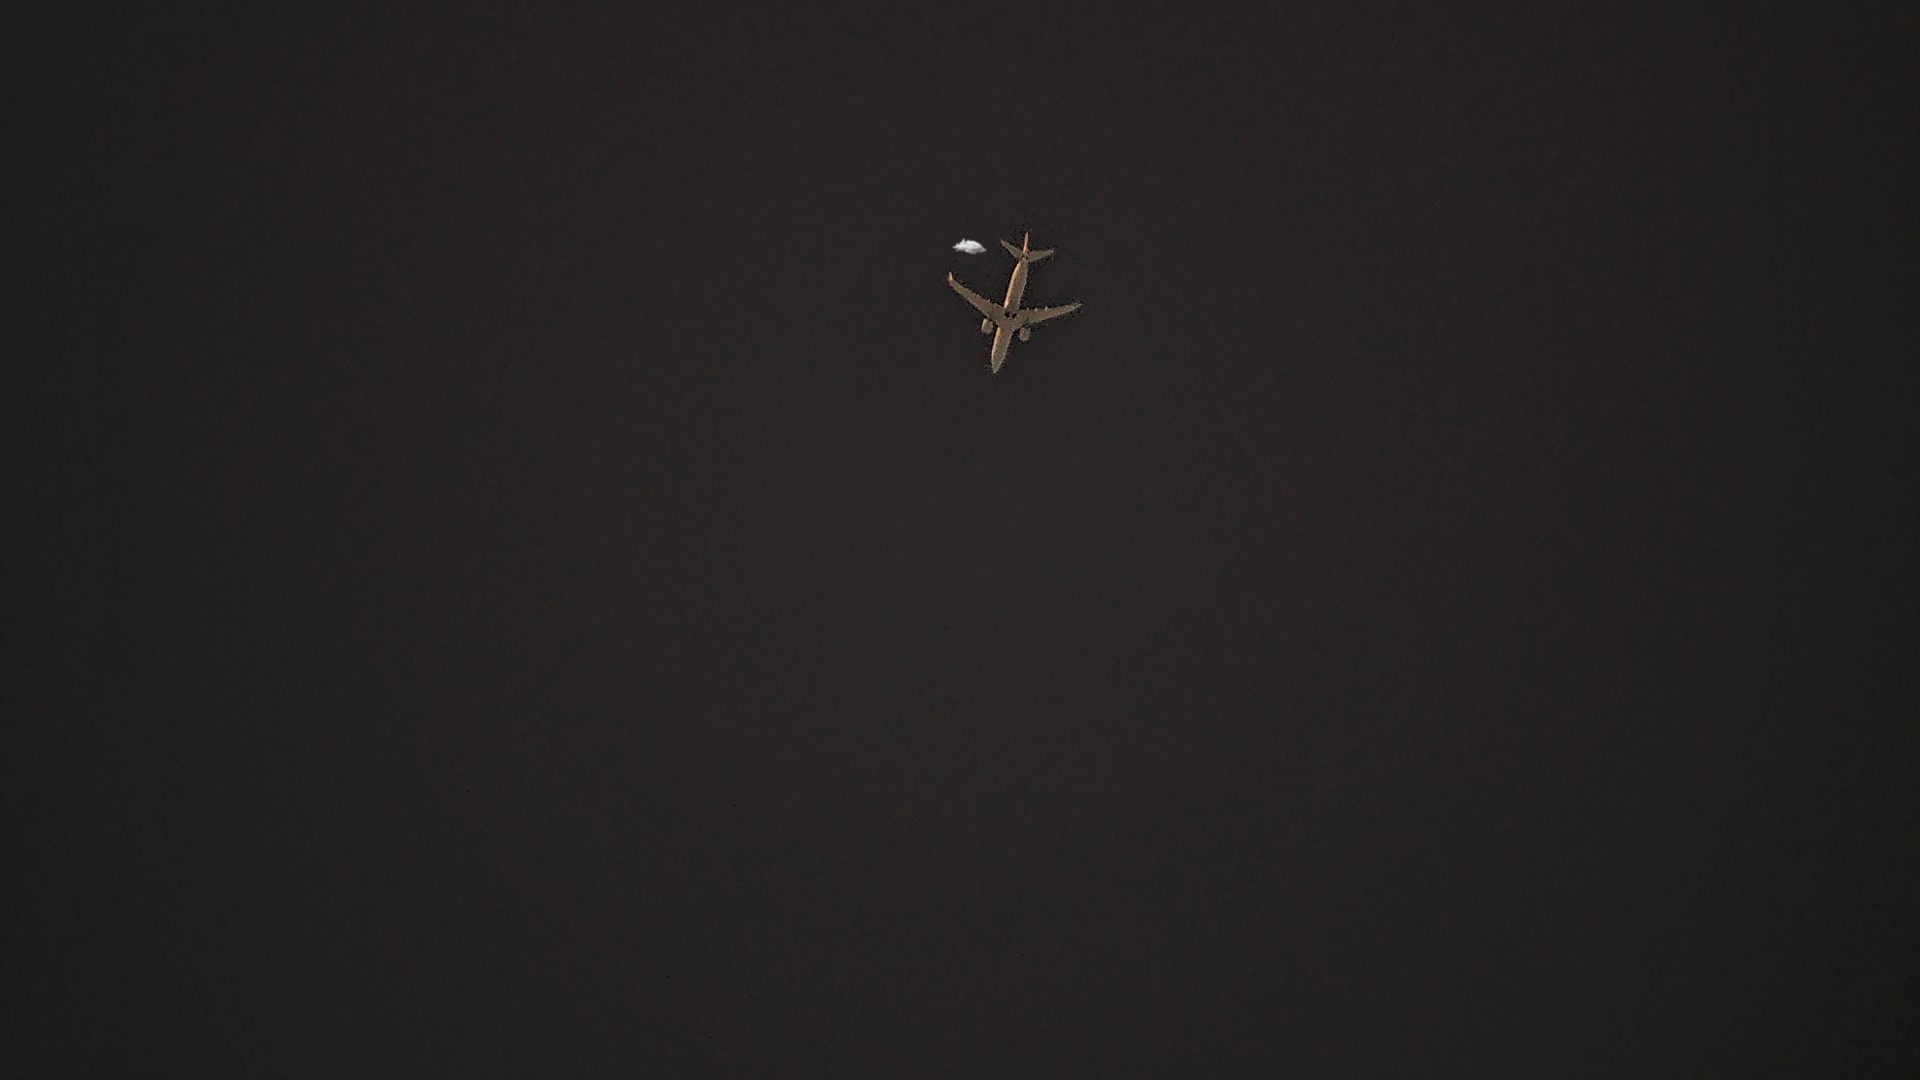

In [13]:

path_target_class_folder =  to_invisible_path + "/"

sample_mod_test_img = Image.open(path_target_class_folder + 'a3c291_198_59_11958_2021-05-13-13-39-27.jpg')

sample_mod_test_img

